## Real-time selective sequencing using nanopore technology. Figures and Analysis

### Introduction

Figure 2

This jupyter notebook requires the R kernel. 

Each figure from the manuscript "Real-time seletive sequencing using nanopore technology" is reproduced in this notebook. Figures are presented by panel and in the order in which they are considered in the manuscript.

In [8]:
library(ggplot2)
library("gridExtra")
library("plyr")

## Selective Enrichment of Targeted Regions of the Lambda Genome

### Figure 2A - 30b/s enrichment over the lambda genome.

Here we show enrichment over two 5 kb regions (10-15 kb and 30-35 kb) sequencing with SQK5 chemistry (30 b/s) and applying read until only to the even numbered channels.


In [9]:
system("genomeCoverageBed -ibam data/fig2/RU7/ALL/ALL_RU7_2D.bam -g data/fig2/lambda.genome -d > data/fig2/RU7/ALL/ALL_RU7_2D.txt",intern=FALSE)
system("genomeCoverageBed -ibam data/fig2/RU7/ALL/ALL_RU7_Complement.bam -g data/fig2/lambda.genome -d > data/fig2/RU7/ALL/ALL_RU7_Complement.txt",intern=FALSE)
system("genomeCoverageBed -ibam data/fig2/RU7/ALL/ALL_RU7_Template.bam -g data/fig2/lambda.genome -d > data/fig2/RU7/ALL/ALL_RU7_Template.txt",intern=FALSE)

system("genomeCoverageBed -ibam data/fig2/RU7/EVEN/EVEN_RU7_2D.bam -g data/fig2/lambda.genome -d > data/fig2/RU7/EVEN/EVEN_RU7_2D.txt",intern=FALSE)
system("genomeCoverageBed -ibam data/fig2/RU7/EVEN/EVEN_RU7_Complement.bam -g data/fig2/lambda.genome -d > data/fig2/RU7/EVEN/EVEN_RU7_Complement.txt",intern=FALSE)
system("genomeCoverageBed -ibam data/fig2/RU7/EVEN/EVEN_RU7_Template.bam -g data/fig2/lambda.genome -d > data/fig2/RU7/EVEN/EVEN_RU7_Template.txt",intern=FALSE)

system("genomeCoverageBed -ibam data/fig2/RU7/ODD/ODD_RU7_2D.bam -g data/fig2/lambda.genome -d > data/fig2/RU7/ODD/ODD_RU7_2D.txt",intern=FALSE)
system("genomeCoverageBed -ibam data/fig2/RU7/ODD/ODD_RU7_Complement.bam -g data/fig2/lambda.genome -d > data/fig2/RU7/ODD/ODD_RU7_Complement.txt",intern=FALSE)
system("genomeCoverageBed -ibam data/fig2/RU7/ODD/ODD_RU7_Template.bam -g data/fig2/lambda.genome -d > data/fig2/RU7/ODD/ODD_RU7_Template.txt",intern=FALSE)


system("perl data/fig3/cov_windows.pl data/fig2/RU7/ALL/ALL_RU7_2D.txt 50",intern=FALSE)
system("perl data/fig3/cov_windows.pl data/fig2/RU7/ALL/ALL_RU7_Complement.txt 50",intern=FALSE)
system("perl data/fig3/cov_windows.pl data/fig2/RU7/ALL/ALL_RU7_Template.txt 50",intern=FALSE)

system("perl data/fig3/cov_windows.pl data/fig2/RU7/EVEN/EVEN_RU7_2D.txt 50",intern=FALSE)
system("perl data/fig3/cov_windows.pl data/fig2/RU7/EVEN/EVEN_RU7_Complement.txt 50",intern=FALSE)
system("perl data/fig3/cov_windows.pl data/fig2/RU7/EVEN/EVEN_RU7_Template.txt 50",intern=FALSE)

system("perl data/fig3/cov_windows.pl data/fig2/RU7/ODD/ODD_RU7_2D.txt 50",intern=FALSE)
system("perl data/fig3/cov_windows.pl data/fig2/RU7/ODD/ODD_RU7_Complement.txt 50",intern=FALSE)
system("perl data/fig3/cov_windows.pl data/fig2/RU7/ODD/ODD_RU7_Template.txt 50",intern=FALSE)

In [10]:
system("genomeCoverageBed -ibam data/fig2/RU9/EVEN/EVEN_RU9_2D.bam_out.bam -g data/fig2/lambda.genome -d > data/fig2/RU9/EVEN/EVEN_RU9_2D_out.txt",intern=FALSE)

system("genomeCoverageBed -ibam data/fig2/RU9/ODD/ODD_RU9_2D.bam_out.bam -g data/fig2/lambda.genome -d > data/fig2/RU9/ODD/ODD_RU9_2D_out.txt",intern=FALSE)
system("perl data/fig3/cov_windows.pl data/fig2/RU9/EVEN/EVEN_RU9_2D_out.txt 50",intern=FALSE)
system("perl data/fig3/cov_windows.pl data/fig2/RU9/ODD/ODD_RU9_2D_out.txt 50",intern=FALSE)

In [11]:
EVEN_RU7_Template = read.csv("data/fig2/RU7/EVEN/EVEN_RU7_Template.txt_in_50_windows.txt", header = FALSE,sep="\t")
EVEN_RU7_Complement = read.csv("data/fig2/RU7/EVEN/EVEN_RU7_Complement.txt_in_50_windows.txt", header = FALSE,sep="\t")
EVEN_RU7_2D = read.csv("data/fig2/RU7/EVEN/EVEN_RU7_2D.txt_in_50_windows.txt", header = FALSE,sep="\t")

ODD_RU7_Template = read.csv("data/fig2/RU7/ODD/ODD_RU7_Template.txt_in_50_windows.txt", header = FALSE,sep="\t")
ODD_RU7_Complement = read.csv("data/fig2/RU7/ODD/ODD_RU7_Complement.txt_in_50_windows.txt", header = FALSE,sep="\t")
ODD_RU7_2D = read.csv("data/fig2/RU7/ODD/ODD_RU7_2D.txt_in_50_windows.txt", header = FALSE,sep="\t")

ALL_RU7_Template = read.csv("data/fig2/RU7/ALL/ALL_RU7_Template.txt_in_50_windows.txt", header = FALSE,sep="\t")
ALL_RU7_Complement = read.csv("data/fig2/RU7/ALL/ALL_RU7_Complement.txt_in_50_windows.txt", header = FALSE,sep="\t")
ALL_RU7_2D = read.csv("data/fig2/RU7/ALL/ALL_RU7_2D.txt_in_50_windows.txt", header = FALSE,sep="\t")

RU7<-cbind(EVEN_RU7_Template,EVEN_RU7_Complement$V3,EVEN_RU7_2D$V3,ODD_RU7_Template$V3,ODD_RU7_Complement$V3,ODD_RU7_2D$V3,ALL_RU7_Template$V3,ALL_RU7_Complement$V3,ALL_RU7_2D$V3)
colnames(RU7) <- c("Ref", "Position","E_Template","E_Complement","E_2D","O_Template","O_Complement","O_2D","A_Template","A_Complement","A_2D")

## We import a file containing the read lengths for 2D sequences in this library:
RU7_lengths = read.csv("data/fig2/RU7/ALL/2Dlengths.txt",header = FALSE,sep="\t")
RU7_lengths <- cbind(RU7_lengths,type="2D")


In [12]:
EVEN_RU9_2D_ROI = read.csv("data/fig2/RU9/EVEN/EVEN_RU9_2D_out.txt_in_50_windows.txt", header = FALSE,sep="\t")
ODD_RU9_2D_ROI = read.csv("data/fig2/RU9/ODD/ODD_RU9_2D_out.txt_in_50_windows.txt", header = FALSE,sep="\t")
RU9_ROI<-cbind(EVEN_RU9_2D_ROI,ODD_RU9_2D_ROI$V3)
colnames(RU9_ROI) <- c("Ref", "Position","E_2D","O_2D")



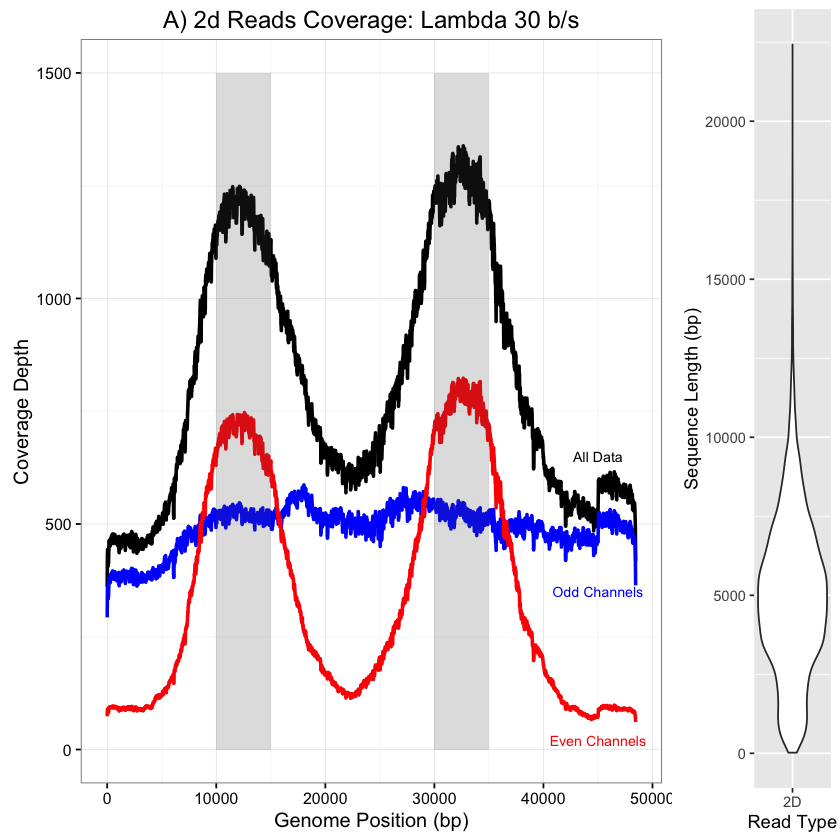

In [13]:
Fig2Ai <- ggplot(data=RU7,aes(x=Position,y=E_2D)) + theme_bw()+ geom_line(aes(x=Position,y=A_2D),size = 1, color="black")+geom_line(aes(x=Position,y=O_2D),size = 1, color="blue")+geom_line(aes(x=Position,y=E_2D),size = 1, color="red") + labs(x = "Genome Position (bp)")+labs(y="Coverage Depth",title = "A) 2d Reads Coverage: Lambda 30 b/s")  + annotate("text", x = 45000, y = 20, label = "Even Channels", color = "red",size=3)+ annotate("text", x = 45000, y = 350, label = "Odd Channels", color = "blue",size=3) + annotate("text", x = 45000, y = 650, label = "All Data", color = "Black",size=3) + annotate("rect", xmin = 10000, xmax = 15000,ymin=0,ymax=1500,alpha = .2) + annotate("rect", xmin = 30000, xmax = 35000,ymin=0,ymax=1500,alpha = .2)
Fig2Aii<-ggplot(data=RU7_lengths,aes(x=type,y=V1))+geom_violin()+ labs(y="Sequence Length (bp)",x="Read Type")
grid.arrange(Fig2Ai,Fig2Aii,       ncol=2, nrow=1, widths=c(16, 4))

channel_name seq_name seq_index seq_length         seq_head read_number
1           31 J02459_R      5518       4915 TGATCGCCTTGCACTC           2
2           33 J02459_R     42782       4988 GCAAATCGTTAACGGC           2
3           35 J02459_F     19191       5061 GGGGTTCGCCGCGTCG           2
4           37 J02459_F     27431       4981 ACTGCTATCTTCTTAC           2
5          103 J02459_R      3369       4958 TACTGATAGAACAAAT           2
6          105 J02459_R      2388       4915 GCCGCGTTCGCCAGCT           2
  read_start read_event_count read_reason     type
1       2115              387     Unblock Template
2       2115              387     Unblock Template
3       2115              387     Unblock Template
4       2115              387     Unblock Template
5       2115              387     Unblock Template
6       2115              387     Unblock Template

Ref Position EVEN ODD ALL
1 simref        0    6   0   6
2 simref        1    6   0   6
3 simref        2    6   0   6
4 simref        3    6   1   7
5 simref        4    6   1   7
6 simref        5    6   1   7

[1] 59510061

[1] 29827907

[1] 29682154

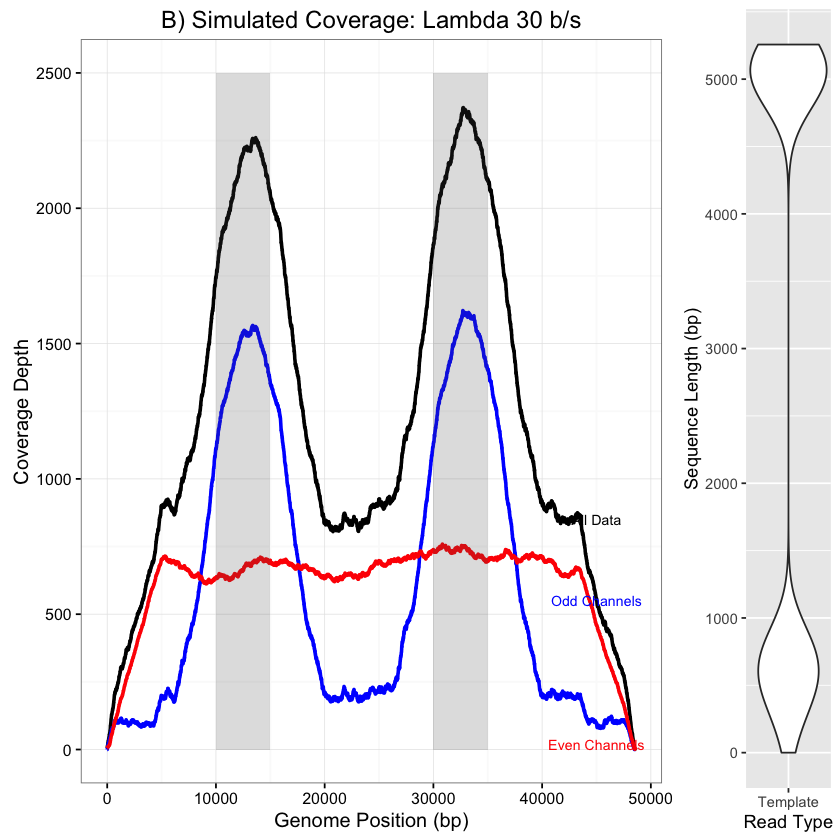

In [14]:
rawdata = read.csv("data/simulations/lambda_shortreads_15s_250m_5kb.log", header = TRUE, sep=",")


rawdata$type<-"Template"
head (rawdata)
#ggplot(data=rawdata,aes(x=type,y=read_event_count))+geom_violin()+ labs(y="Sequence Length (bp)",x="Read Type")



EVEN2_SIM_1D_ROI = read.csv("data/simulations/512_2_5kb_FR_ru2_15s_250m_EVEN.txt", header = FALSE,sep="\t")
ODD2_SIM_1D_ROI = read.csv("data/simulations/512_2_5kb_FR_ru2_15s_250m_ODD.txt", header = FALSE,sep="\t")
ALL2_SIM_1D_ROI = read.csv("data/simulations/512_2_5kb_FR_ru2_15s_250m_ALL.txt", header = FALSE,sep="\t")



SIM_ROI2<-cbind(EVEN2_SIM_1D_ROI,ODD2_SIM_1D_ROI$V3,ALL2_SIM_1D_ROI$V3)
colnames(SIM_ROI2) <- c("Ref", "Position","EVEN","ODD","ALL")
head(SIM_ROI2)

#ggplot(data=SIM_ROI2,aes(x=Position,y=ALL )) + theme_bw()+ geom_line(aes(x=Position,y=ALL),size = 1, color="black")+geom_line(aes(x=Position,y=ODD),size = 1, color="blue")+geom_line(aes(x=Position,y=EVEN),size = 1, color="red") + labs(x = "Genome Position (bp)")+labs(y="Coverage Depth",title = "D) Simulated Coverage: Lambda 30 b/s")  + annotate("text", x = 45000, y = 20, label = "Even Channels", color = "red",size=3)+ annotate("text", x = 45000, y = 550, label = "Odd Channels", color = "blue",size=3) + annotate("text", x = 45000, y = 850, label = "All Data", color = "Black",size=3) + annotate("rect", xmin = 10000, xmax = 15000,ymin=0,ymax=2500,alpha = .2) + annotate("rect", xmin = 30000, xmax = 35000,ymin=0,ymax=2500,alpha = .2)



sum(SIM_ROI2$ALL)
sum(SIM_ROI2$EVEN)
sum(SIM_ROI2$ODD)



Fig2Bi<-ggplot(data=SIM_ROI2,aes(x=Position,y=ALL )) + theme_bw()+ geom_line(aes(x=Position,y=ALL),size = 1, color="black")+geom_line(aes(x=Position,y=ODD),size = 1, color="blue")+geom_line(aes(x=Position,y=EVEN),size = 1, color="red") + labs(x = "Genome Position (bp)")+labs(y="Coverage Depth",title = "B) Simulated Coverage: Lambda 30 b/s")  + annotate("text", x = 45000, y = 20, label = "Even Channels", color = "red",size=3)+ annotate("text", x = 45000, y = 550, label = "Odd Channels", color = "blue",size=3) + annotate("text", x = 45000, y = 850, label = "All Data", color = "Black",size=3) + annotate("rect", xmin = 10000, xmax = 15000,ymin=0,ymax=2500,alpha = .2) + annotate("rect", xmin = 30000, xmax = 35000,ymin=0,ymax=2500,alpha = .2)
Fig2Bii<-ggplot(data=rawdata,aes(x=type,y=read_event_count))+geom_violin()+ labs(y="Sequence Length (bp)",x="Read Type")
grid.arrange(Fig2Bi,Fig2Bii,       ncol=2, nrow=1, widths=c(16, 4))




In [15]:
simdata = read.csv("data/simulations/512_2_5kb_FR_ru2.log", header = TRUE,sep=",")

simdata$start<-simdata$seq_index
simdata$start[simdata$seq_name == "J02459_R"]<- 48503-simdata$seq_index[simdata$seq_name == "J02459_R"]
simdata$type<-"EvenRU"
simdata$type[simdata$channel_name %% 2 == 0]<- "OddNoRU"


head(simdata)


subsetmergedata <- simdata[which(simdata$start>=12250 & simdata$start<=12750),]
subsetmergedata2 <- simdata[which(simdata$start>=32250 & simdata$start<=32750),]

head(subsetmergedata)

eventotal <- simdata[which(simdata$type=="EvenRU"),]
oddtotal <- simdata[which(simdata$type=="OddNoRU"),]



evensubset <- subsetmergedata[which(subsetmergedata$type=="EvenRU"),]
oddsubset <- subsetmergedata[which(subsetmergedata$type=="OddNoRU"),]


evensubset2 <- subsetmergedata2[which(subsetmergedata2$type=="EvenRU"),]
oddsubset2 <- subsetmergedata2[which(subsetmergedata2$type=="OddNoRU"),]

sum(eventotal$read_event_count)
sum(oddtotal$read_event_count)

sum(evensubset$read_event_count)
sum(oddsubset$read_event_count)

sum(evensubset$read_event_count)/sum(oddsubset$read_event_count)

sum(evensubset2$read_event_count)
sum(oddsubset2$read_event_count)

sum(evensubset2$read_event_count)/sum(oddsubset2$read_event_count)

#Total Even
sum(sum(evensubset$read_event_count),sum(evensubset2$read_event_count))

#Total Odd
sum(sum(oddsubset$read_event_count),sum(oddsubset2$read_event_count))

#Fold Enrichment
sum(sum(evensubset$read_event_count),sum(evensubset2$read_event_count))/sum(sum(oddsubset$read_event_count),sum(oddsubset2$read_event_count))


(sum(sum(evensubset$read_event_count),sum(evensubset2$read_event_count))/sum(eventotal$read_event_count))/(sum(sum(oddsubset$read_event_count),sum(oddsubset2$read_event_count))/sum(oddtotal$read_event_count))



channel_name seq_name seq_index seq_length         seq_head read_number
1           33 J02459_R     41176       4051 TCAAGCTCCTCTTTCA           2
2           35 J02459_F     16541       4096 GCGCTGTATGCCGGTA           2
3           37 J02459_F     34546       3983 GAGAACCATGTATATG           2
4           91 J02459_F      6108       4054 TGCGGCTTTTTTTACG           2
5           93 J02459_R     19086       4019 AAACGATACTTGCCCT           2
6           95 J02459_F     19519       4023 GAAGGCTCCGGCAGTG           2
  read_start read_event_count read_reason start   type
1       2135              293     Unblock  7327 EvenRU
2       2135              293     Unblock 16541 EvenRU
3       2135              293     Unblock 34546 EvenRU
4       2135              293     Unblock  6108 EvenRU
5       2135              293     Unblock 29417 EvenRU
6       2135              293     Unblock 19519 EvenRU

channel_name seq_name seq_index seq_length         seq_head read_number
549          146 J02459_R     35963       3960 CATATTCTGTGCAATA           2
587          448 J02459_R     35911       3977 CGGAACGGGTGAAGCT           2
601           77 J02459_F     12384       4004 AGAAAAAGACCTGGGC           2
649          358 J02459_R     36036       3979 TCTTCCCACTCACTCC           2
751          300 J02459_F     12362       4049 CTGAATAACGTCATGT           2
785          313 J02459_R     36232       4062 CAATGGCGGCCCGTTT           2
    read_start read_event_count read_reason start    type
549       2135             4027     Natural 12540 OddNoRU
587       2135             4044     Natural 12592 OddNoRU
601       2135             4071     Natural 12384  EvenRU
649       2135             4046     Natural 12467 OddNoRU
751       2135             4116     Natural 12362 OddNoRU
785       2135             4129     Natural 12271  EvenRU

[1] 29038746

[1] 29152301

[1] 794367

[1] 325328

[1] 2.441742

[1] 838616

[1] 365447

[1] 2.294768

[1] 1632983

[1] 690775

[1] 2.363987

[1] 2.373231

### Figure 2C - 70b/s enrichment over the lambda genome.

Here we show enrichment over two 5 kb regions (10-15 kb and 35-40 kb) sequencing with SQK6 chemistry (70 b/s) and applying read until only to the even numbered channels.



In [ ]:
system("genomeCoverageBed -ibam data/fig2/RU9/ALL/ALL_RU9_2D.bam -g data/fig2/lambda.genome -d > data/fig2/RU9/ALL/ALL_RU9_2D.txt",intern=FALSE)
system("genomeCoverageBed -ibam data/fig2/RU9/ALL/ALL_RU9_Complement.bam -g data/fig2/lambda.genome -d > data/fig2/RU9/ALL/ALL_RU9_Complement.txt",intern=FALSE)
system("genomeCoverageBed -ibam data/fig2/RU9/ALL/ALL_RU9_Template.bam -g data/fig2/lambda.genome -d > data/fig2/RU9/ALL/ALL_RU9_Template.txt",intern=FALSE)

system("genomeCoverageBed -ibam data/fig2/RU9/EVEN/EVEN_RU9_2D.bam -g data/fig2/lambda.genome -d > data/fig2/RU9/EVEN/EVEN_RU9_2D.txt",intern=FALSE)
system("genomeCoverageBed -ibam data/fig2/RU9/EVEN/EVEN_RU9_Complement.bam -g data/fig2/lambda.genome -d > data/fig2/RU9/EVEN/EVEN_RU9_Complement.txt",intern=FALSE)
system("genomeCoverageBed -ibam data/fig2/RU9/EVEN/EVEN_RU9_Template.bam -g data/fig2/lambda.genome -d > data/fig2/RU9/EVEN/EVEN_RU9_Template.txt",intern=FALSE)

system("genomeCoverageBed -ibam data/fig2/RU9/ODD/ODD_RU9_2D.bam -g data/fig2/lambda.genome -d > data/fig2/RU9/ODD/ODD_RU9_2D.txt",intern=FALSE)
system("genomeCoverageBed -ibam data/fig2/RU9/ODD/ODD_RU9_Complement.bam -g data/fig2/lambda.genome -d > data/fig2/RU9/ODD/ODD_RU9_Complement.txt",intern=FALSE)
system("genomeCoverageBed -ibam data/fig2/RU9/ODD/ODD_RU9_Template.bam -g data/fig2/lambda.genome -d > data/fig2/RU9/ODD/ODD_RU9_Template.txt",intern=FALSE)


system("perl data/fig3/cov_windows.pl data/fig2/RU9/ALL/ALL_RU9_2D.txt 50",intern=FALSE)
system("perl data/fig3/cov_windows.pl data/fig2/RU9/ALL/ALL_RU9_Complement.txt 50",intern=FALSE)
system("perl data/fig3/cov_windows.pl data/fig2/RU9/ALL/ALL_RU9_Template.txt 50",intern=FALSE)

system("perl data/fig3/cov_windows.pl data/fig2/RU9/EVEN/EVEN_RU9_2D.txt 50",intern=FALSE)
system("perl data/fig3/cov_windows.pl data/fig2/RU9/EVEN/EVEN_RU9_Complement.txt 50",intern=FALSE)
system("perl data/fig3/cov_windows.pl data/fig2/RU9/EVEN/EVEN_RU9_Template.txt 50",intern=FALSE)

system("perl data/fig3/cov_windows.pl data/fig2/RU9/ODD/ODD_RU9_2D.txt 50",intern=FALSE)
system("perl data/fig3/cov_windows.pl data/fig2/RU9/ODD/ODD_RU9_Complement.txt 50",intern=FALSE)
system("perl data/fig3/cov_windows.pl data/fig2/RU9/ODD/ODD_RU9_Template.txt 50",intern=FALSE)


In [ ]:
EVEN_RU9_Template = read.csv("data/fig2/RU9/EVEN/EVEN_RU9_Template.txt_in_50_windows.txt", header = FALSE,sep="\t")
EVEN_RU9_Complement = read.csv("data/fig2/RU9/EVEN/EVEN_RU9_Complement.txt_in_50_windows.txt", header = FALSE,sep="\t")
EVEN_RU9_2D = read.csv("data/fig2/RU9/EVEN/EVEN_RU9_2D.txt_in_50_windows.txt", header = FALSE,sep="\t")

ODD_RU9_Template = read.csv("data/fig2/RU9/ODD/ODD_RU9_Template.txt_in_50_windows.txt", header = FALSE,sep="\t")
ODD_RU9_Complement = read.csv("data/fig2/RU9/ODD/ODD_RU9_Complement.txt_in_50_windows.txt", header = FALSE,sep="\t")
ODD_RU9_2D = read.csv("data/fig2/RU9/ODD/ODD_RU9_2D.txt_in_50_windows.txt", header = FALSE,sep="\t")

ALL_RU9_Template = read.csv("data/fig2/RU9/ALL/ALL_RU9_Template.txt_in_50_windows.txt", header = FALSE,sep="\t")
ALL_RU9_Complement = read.csv("data/fig2/RU9/ALL/ALL_RU9_Complement.txt_in_50_windows.txt", header = FALSE,sep="\t")
ALL_RU9_2D = read.csv("data/fig2/RU9/ALL/ALL_RU9_2D.txt_in_50_windows.txt", header = FALSE,sep="\t")

RU9<-cbind(EVEN_RU9_Template,EVEN_RU9_Complement$V3,EVEN_RU9_2D$V3,ODD_RU9_Template$V3,ODD_RU9_Complement$V3,ODD_RU9_2D$V3,ALL_RU9_Template$V3,ALL_RU9_Complement$V3,ALL_RU9_2D$V3)
colnames(RU9) <- c("Ref", "Position","E_Template","E_Complement","E_2D","O_Template","O_Complement","O_2D","A_Template","A_Complement","A_2D")

## We import a file containing the read lengths for 2D sequences in this library:
RU9_lengths = read.csv("data/fig2/RU9/ALL/2Dlengths.txt",header = FALSE,sep="\t")
RU9_lengths <- cbind(RU9_lengths,type="2D")

In [ ]:
Fig2Ci<-ggplot(data=RU9,aes(x=Position,y=E_2D)) + theme_bw() +geom_line(aes(x=Position,y=A_2D),size = 1, color="black")+geom_line(aes(x=Position,y=O_2D),size = 1, color="blue")+geom_line(aes(x=Position,y=E_2D),size = 1, color="red") + labs(x = "Genome Position (bp)")+labs(y="Coverage Depth",title = "C) 2d Reads Coverage: Lambda 70 b/s") + annotate("text", x = 45000, y = 80, label = "Even Channels", color = "red",size=3)+ annotate("text", x = 45200, y = 720, label = "Odd Channels", color = "blue",size=3) + annotate("text", x = 47000, y = 410, label = "All Data", color = "Black",size=3) + annotate("rect", xmin = 10000, xmax = 15000,ymin=0,ymax=1700,alpha = .2) + annotate("rect", xmin = 35000, xmax = 40000,ymin=0,ymax=1700,alpha = .2)
Fig2Cii<-ggplot(data=RU9_lengths,aes(x=type,y=V1))+geom_violin()+ labs(y="Sequence Length (bp)",x="Read Type")
grid.arrange(Fig2Ci,Fig2Cii,       ncol=2, nrow=1, widths=c(16, 4))


### Figure 2D - 70b/s enrichment over the lambda genome - single peak.

Here we show enrichment over one 10 kb regions (15-25 kb) sequencing with SQK6 chemistry (70 b/s) and applying read until to all the channels.


In [ ]:
system("genomeCoverageBed -ibam data/fig2/RU11/ALL_RU11_2D.bam -g data/fig2/lambda.genome -d > data/fig2/RU11/ALL_RU11_2D.txt",intern=FALSE)
system("genomeCoverageBed -ibam data/fig2/RU11/ALL_RU11_Complement.bam -g data/fig2/lambda.genome -d > data/fig2/RU11/ALL_RU11_Complement.txt",intern=FALSE)
system("genomeCoverageBed -ibam data/fig2/RU11/ALL_RU11_Template.bam -g data/fig2/lambda.genome -d > data/fig2/RU11/ALL_RU11_Template.txt",intern=FALSE)

system("perl data/fig3/cov_windows.pl data/fig2/RU11/ALL_RU11_2D.txt 50",intern=FALSE)
system("perl data/fig3/cov_windows.pl data/fig2/RU11/ALL_RU11_Complement.txt 50",intern=FALSE)
system("perl data/fig3/cov_windows.pl data/fig2/RU11/ALL_RU11_Template.txt 50",intern=FALSE)


In [ ]:
ALL_RU11_Template = read.csv("data/fig2/RU11/ALL_RU11_Template.txt_in_50_windows.txt", header = FALSE,sep="\t")
ALL_RU11_Complement = read.csv("data/fig2/RU11/ALL_RU11_Complement.txt_in_50_windows.txt", header = FALSE,sep="\t")
ALL_RU11_2D = read.csv("data/fig2/RU11/ALL_RU11_2D.txt_in_50_windows.txt", header = FALSE,sep="\t")

RU11<-cbind(ALL_RU11_Template,ALL_RU11_Complement$V3,ALL_RU11_2D$V3)
colnames(RU11) <- c("Ref", "Position","Template","Complement","R2D")
RU11_lengths = read.csv("data/fig2/RU11/2Dlengths.txt",header = FALSE,sep="\t")
RU11_lengths <- cbind(RU11_lengths,type="2D")

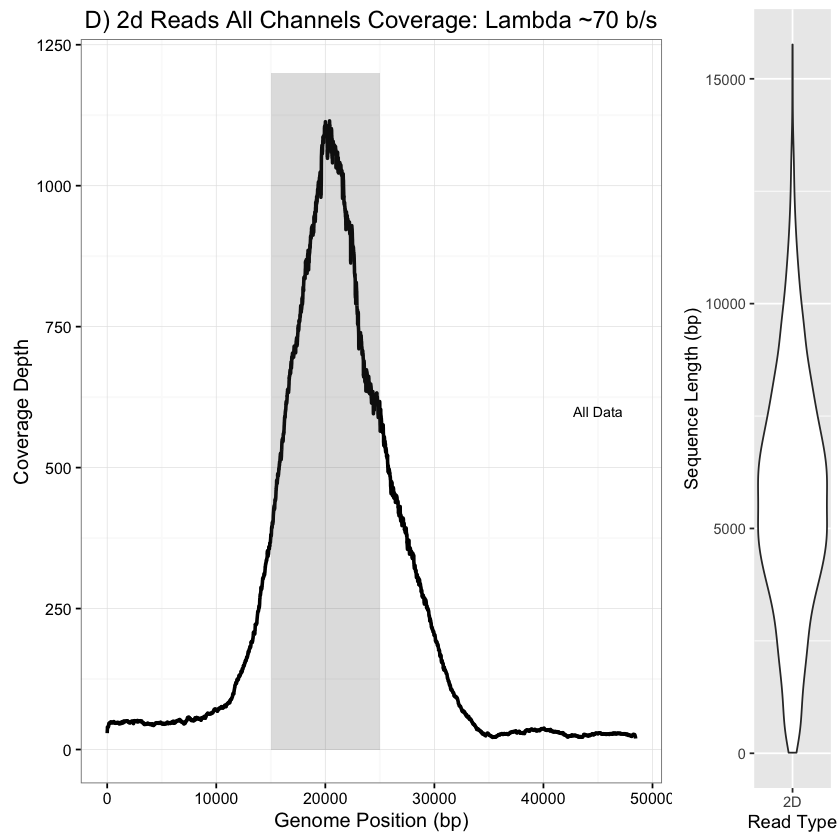

In [81]:
Fig2Ci<-ggplot(data=RU11,aes(x=Position,y=R2D)) + theme_bw() +geom_line(aes(x=Position,y=R2D),size = 1, color="black") + labs(x = "Genome Position (bp)")+labs(y="Coverage Depth",title = "D) 2d Reads All Channels Coverage: Lambda ~70 b/s")  + annotate("rect", xmin = 15000, xmax = 25000,ymin=0,ymax=1200,alpha = .2)+ annotate("text", x = 45000, y = 600, label = "All Data", color = "Black",size=3)
Fig2Cii<-ggplot(data=RU11_lengths,aes(x=type,y=V1))+geom_violin()+ labs(y="Sequence Length (bp)",x="Read Type")
grid.arrange(Fig2Ci,Fig2Cii,       ncol=2, nrow=1, widths=c(16, 4))